In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

<Axes: >

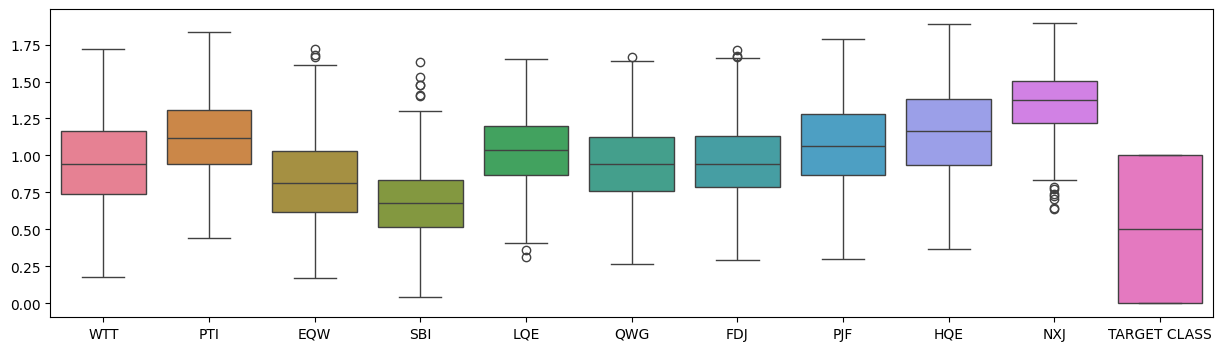

In [7]:
plt.figure(figsize = (15,4))
sns.boxplot(df)

In [8]:
x = df.drop("TARGET CLASS",axis = 1)
y = df["TARGET CLASS"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

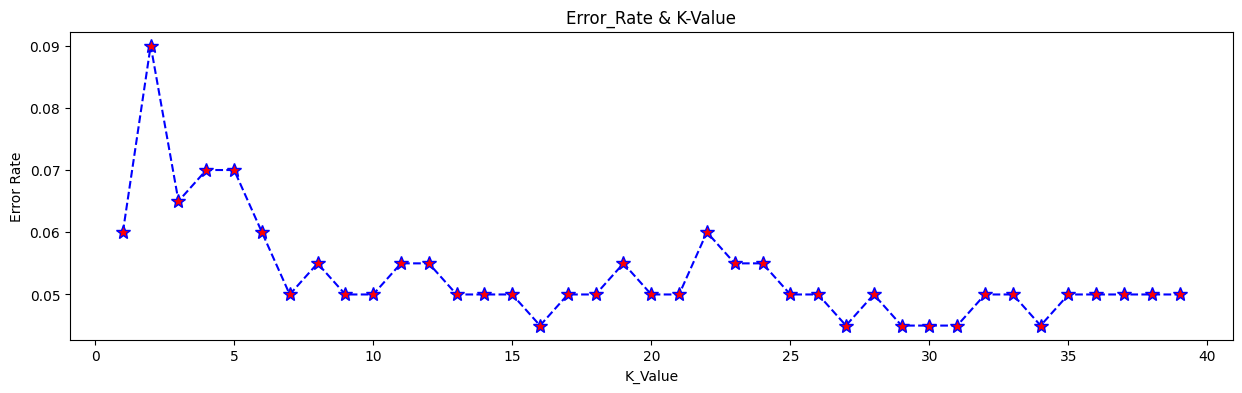

In [13]:
plt.figure(figsize = (15,4))
plt.plot(range(1,40),error_rate,color = "blue",linestyle = "dashed",marker = "*",markersize = 10,markerfacecolor = "red")
plt.title("Error_Rate & K-Value")
plt.xlabel("K_Value")
plt.ylabel("Error Rate")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
predict = knn.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
confusion_matrix(y_test,predict)

array([[101,   5],
       [  4,  90]], dtype=int64)

In [17]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

